<a href="https://colab.research.google.com/github/SiyumiJayawardhane/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-I/Patient_Risk_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive
import os

**2. Load and Inspect the Dataset**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Load The Dataset
data=pd.read_csv("/content/drive/MyDrive/DSGP/New/preprocessed_new_dataset.csv")

In [28]:
data.head()

,Gender,Continent,Age_group,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,HPV_Related_No,HPV_Related_Yes
0,0,4,0,True,False,False,False,True,False,True,True,False
1,1,0,2,True,False,False,False,True,False,True,True,False
2,1,0,2,False,False,True,False,True,False,True,False,True
3,0,4,1,False,False,True,False,True,False,True,True,False
4,0,0,0,False,False,True,False,True,False,True,True,False


In [29]:
data.shape

(64653, 12)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       64653 non-null  int64
 1   Continent                    64653 non-null  int64
 2   Age_group                    64653 non-null  int64
 3   Socioeconomic_Status_High    64653 non-null  bool 
 4   Socioeconomic_Status_Low     64653 non-null  bool 
 5   Socioeconomic_Status_Middle  64653 non-null  bool 
 6   Tobacco_Use_No               64653 non-null  bool 
 7   Tobacco_Use_Yes              64653 non-null  bool 
 8   Alcohol_Use_No               64653 non-null  bool 
 9   Alcohol_Use_Yes              64653 non-null  bool 
 10  HPV_Related_No               64653 non-null  bool 
 11  HPV_Related_Yes              64653 non-null  bool 
dtypes: bool(9), int64(3)
memory usage: 2.0 MB


**3. Mulitocollinearity Check**

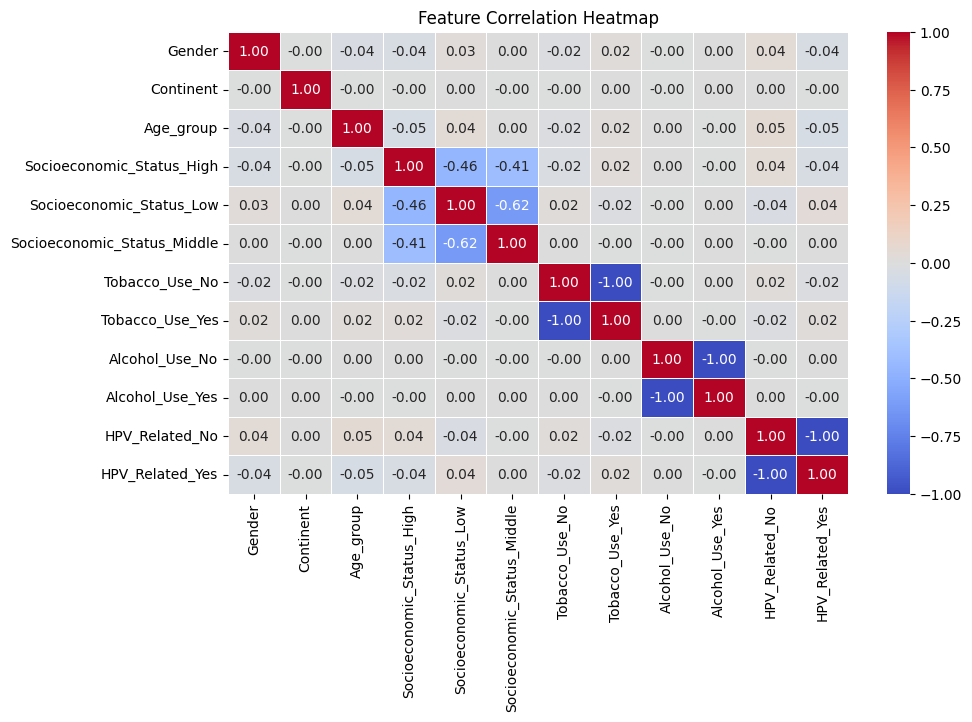

In [31]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**4. Feature Selection**

In [32]:
#Feature selection for clustering
features = ['Tobacco_Use_Yes','Alcohol_Use_Yes','HPV_Related_Yes','Socioeconomic_Status_Low','Gender']
X = data[features]

**5. Exploratory Data Analysis**

**Histogram shows how each selected feature is distributed in the dataset. It helps to understand the spread and frequency of values before applying clustering.

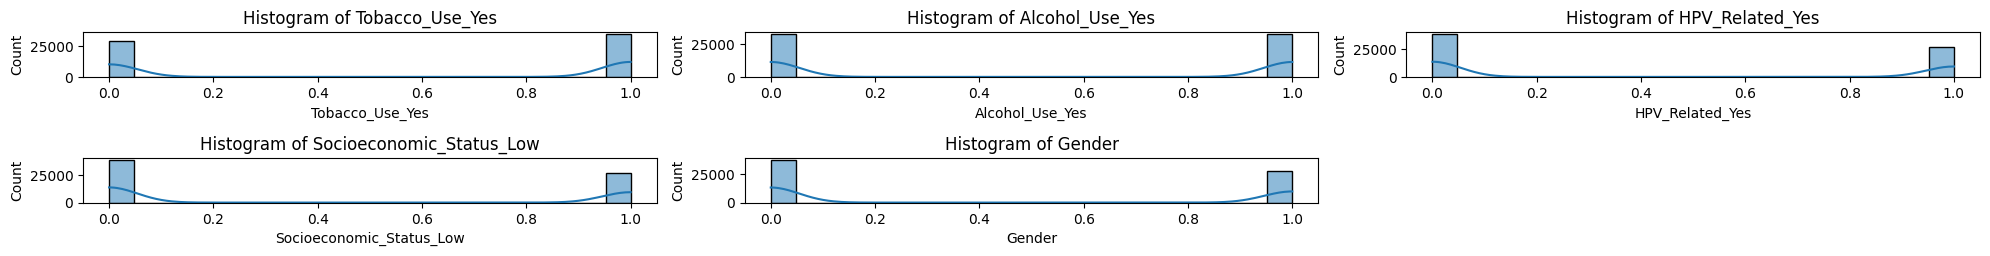

In [33]:
# Plot histogram for each feature
plt.figure(figsize=(20,6))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

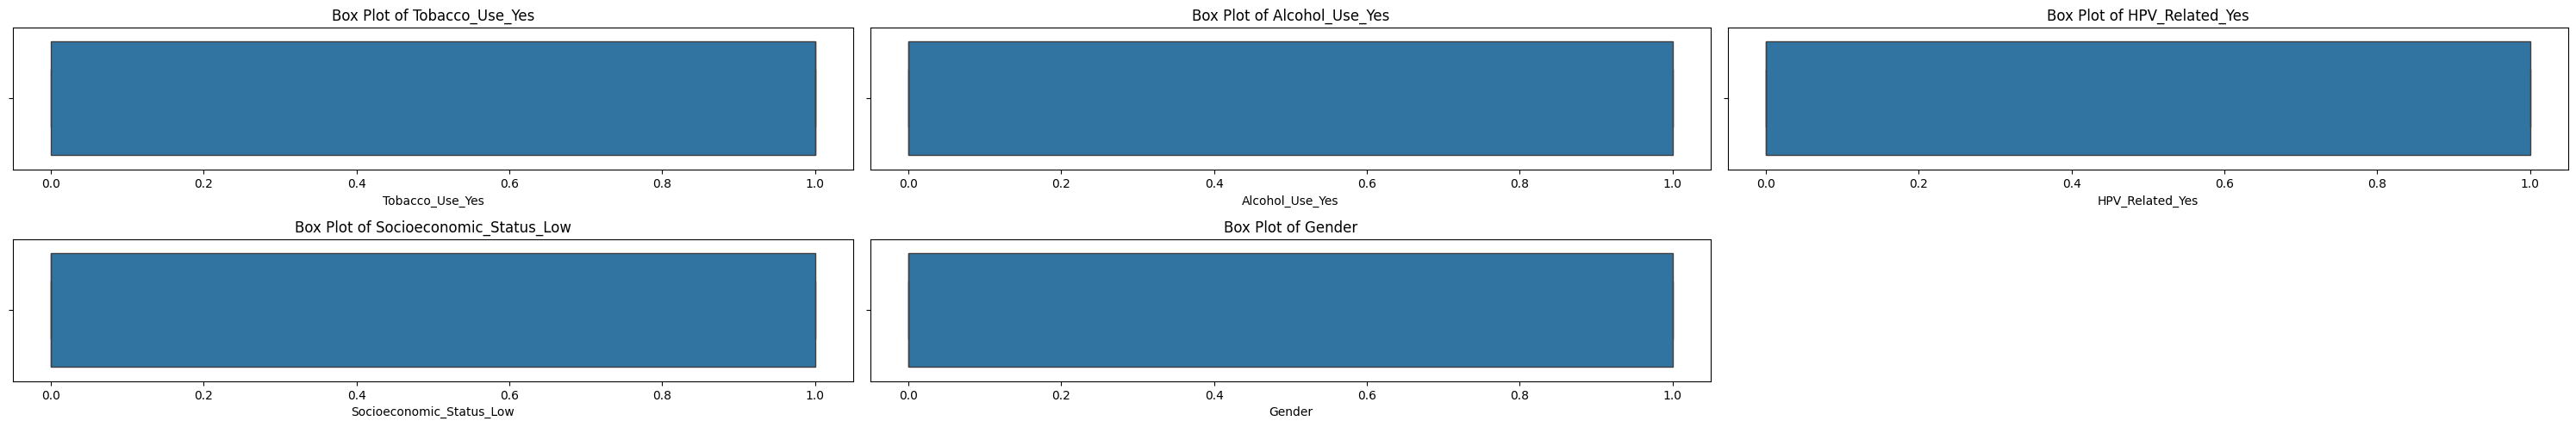

In [34]:
# Plot box plots for each feature to detect outliers
plt.figure(figsize=(30,12))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

**6. KMeans Clustering: Elbow Method**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

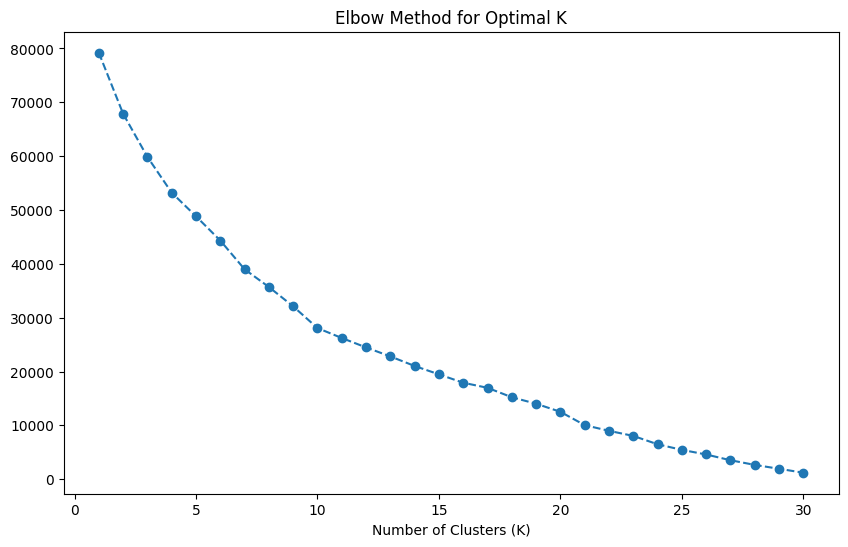

In [35]:
#Use Elbow Method to Determine Optimal Number of Clusters
# Initialize Within-Cluster Sum of Squares
wcss = []

# Iterate over a range of cluster counts
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[features])
    wcss.append(kmeans.inertia_)

# Plot WCSS values to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt

**7. KMeans Clustering: Silhouette Analysis**

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of K values to test
k_values = [2,3,4,5,7,8,9,10]

# Dictionary to store silhouette scores for each K value
silhouette_scores = {}

# Loop through different values of K and compute silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Compute silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Find the best K with highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nBest K based on silhouette score: {best_k}")

Silhouette Score for K=2: 0.2217
Silhouette Score for K=3: 0.1947
Silhouette Score for K=4: 0.2457
Silhouette Score for K=5: 0.2581
Silhouette Score for K=7: 0.3048
Silhouette Score for K=8: 0.3245
Silhouette Score for K=9: 0.3562
Silhouette Score for K=10: 0.3970

Best K based on silhouette score: 10


**8. Final KMeans Clustering**

In [37]:
#Applied K-Means clustering with 10 clusters and assigned cluster labels
kmeans = KMeans(n_clusters=10, random_state=42, max_iter=1000)
kmeans.fit_predict(data[features])

data['Cluster'] = kmeans.labels_

In [38]:
print(data["Cluster"].value_counts())

Cluster
0    9220
1    8374
2    7624
8    6321
4    6083
5    6017
9    5840
7    5307
6    5074
3    4793
Name: count, dtype: int64


**9. Cluster-wise Feature Distribution**

**violin plot shows how each risk feature (like tobacco, alcohol) is distributed across the clusters. it helps to see which clusters have higher or lower values for each feature, so we can label them as high, medium, or low risk.

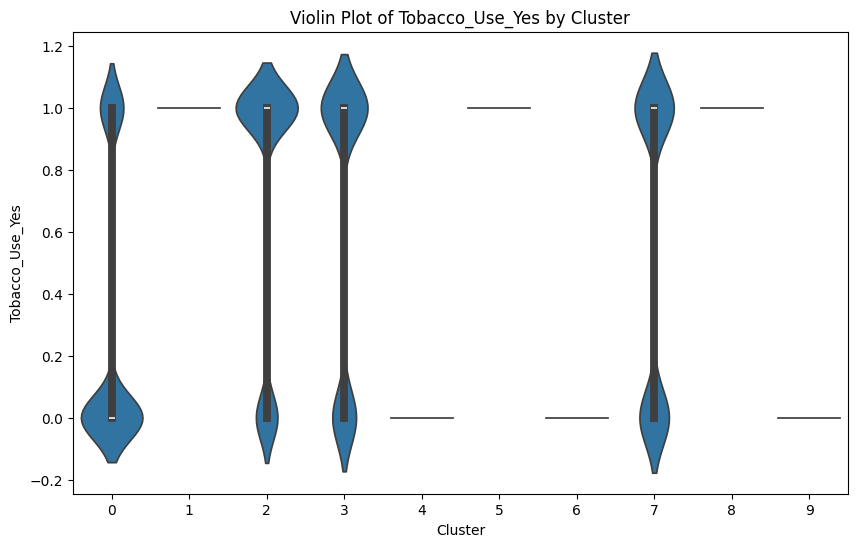

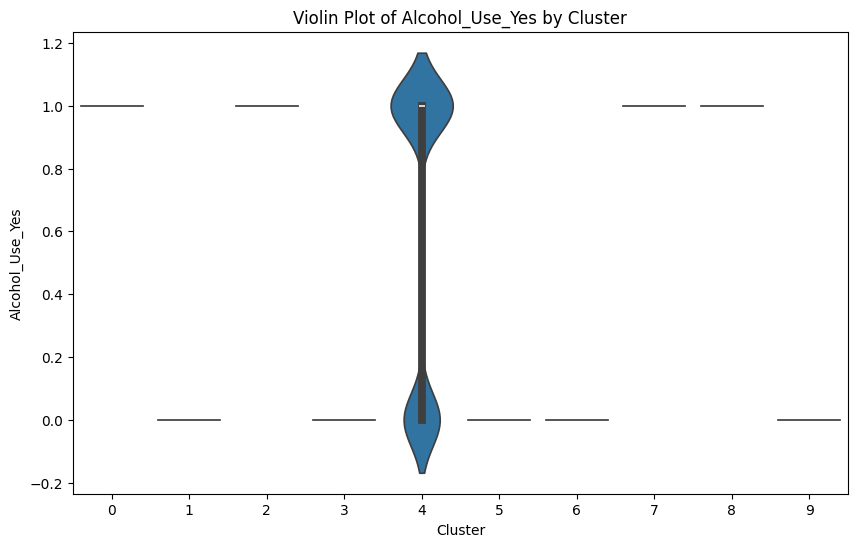

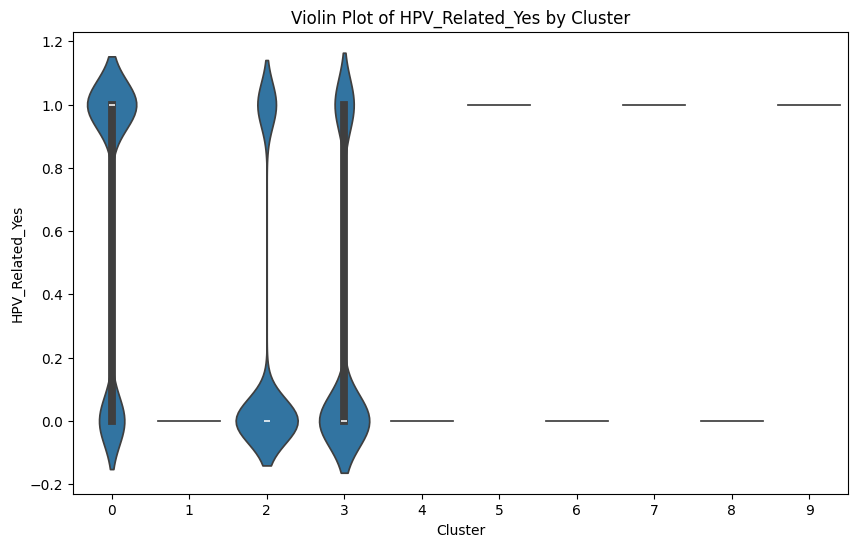

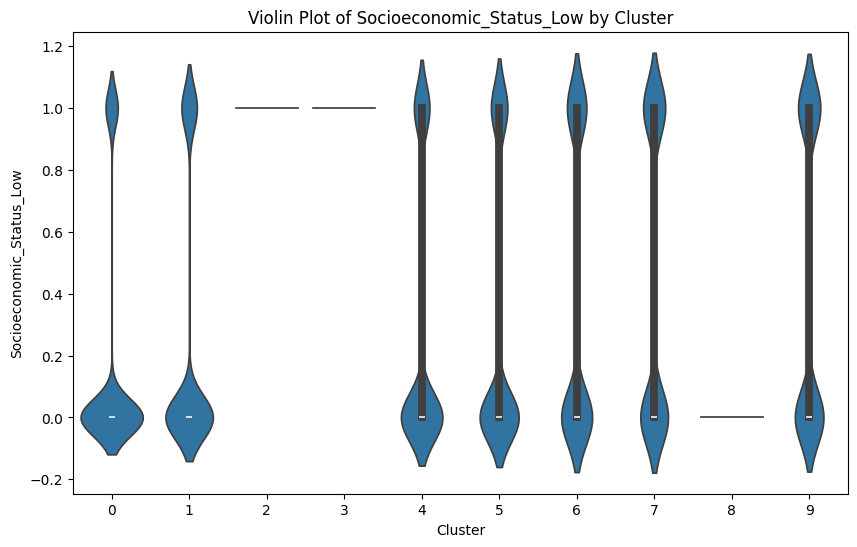

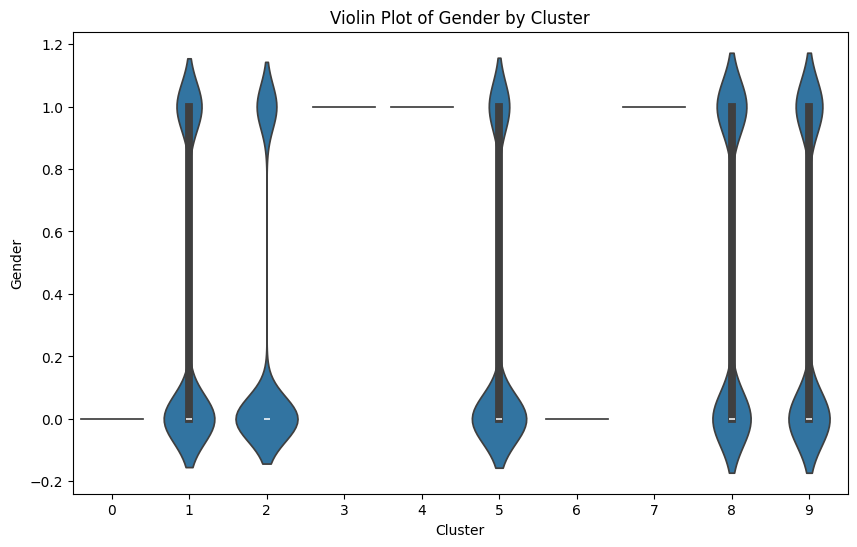

In [39]:
# Display violin plots for Each Feature by Cluster
data["Cluster"] = kmeans.labels_

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cluster', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} by Cluster')
    plt.xlabel('Cluster')

**10. Cluster Visualization with PCA**

**Reduces the features(5D) to 2D using PCA and shows the clusters in a scatter plot

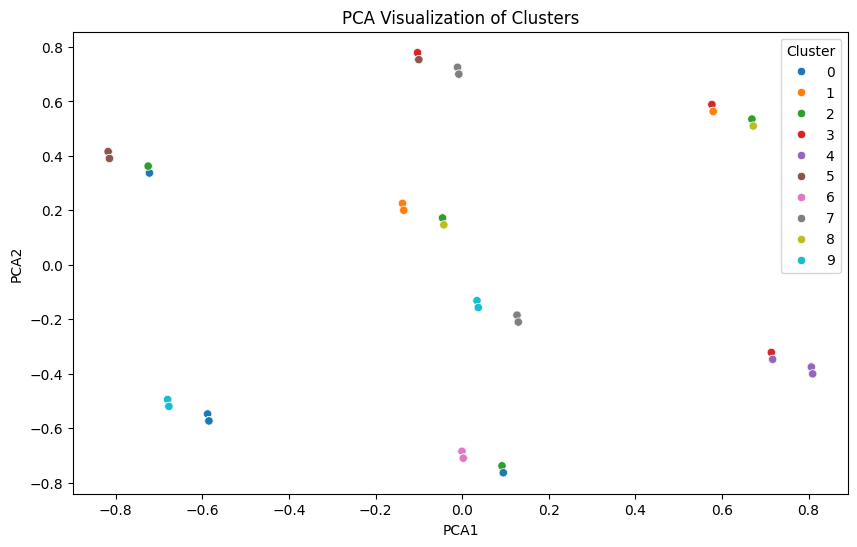

In [40]:
# Visualize with PCA
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Add PCA components to the dataset
data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

# Visualized Clusters in 2D PCA Space
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="tab10")
plt.title('PCA Visualization of Clusters')
plt.show()

**11. Cluster Size Analysis**

Cluster
0    9220
1    8374
2    7624
8    6321
4    6083
5    6017
9    5840
7    5307
6    5074
3    4793
Name: count, dtype: int64


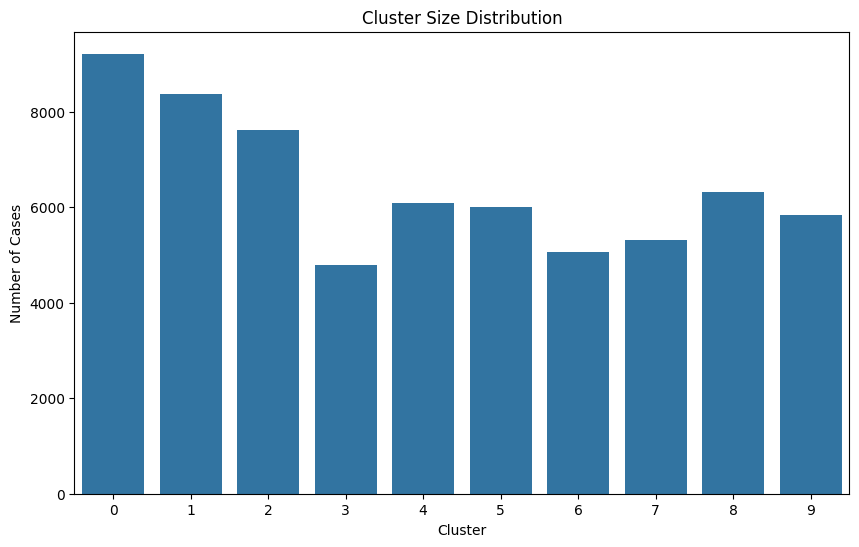

In [41]:
# Count the number of rows per cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

# Visualized Cluster Size Distribution Using Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Cases')
plt.title('Cluster Size Distribution')
plt.show()

**12. Feature Variance**

,Tobacco_Use_Yes,Alcohol_Use_Yes,HPV_Related_Yes,Socioeconomic_Status_Low,Gender
Cluster,,,,,
0,0.199665,0.000000,0.224292,0.137113,0.000000
1,0.000000,0.000000,0.000000,0.185081,0.221312
2,0.191271,0.000000,0.177440,0.000000,0.182985
3,0.223393,0.000000,0.199691,0.000000,0.000000
4,0.000000,0.232373,0.000000,0.198155,0.000000
5,0.000000,0.000000,0.000000,0.208620,0.198682
6,0.000000,0.000000,0.000000,0.237025,0.000000
7,0.245013,0.000000,0.000000,0.246862,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.246104


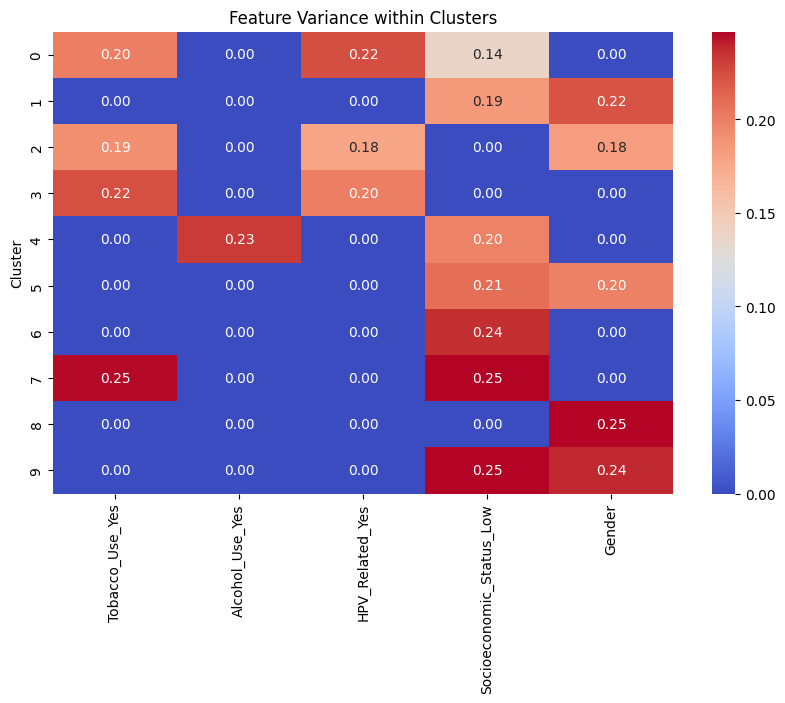

In [42]:
# Calculate feature variance within clusters
features = ['Tobacco_Use_Yes','Alcohol_Use_Yes','HPV_Related_Yes','Socioeconomic_Status_Low','Gender']
cluster_variance = data.groupby('Cluster')[features].var()
display(cluster_variance)

# Visualize feature variance using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_variance, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Variance within Clusters')
plt.show()

**13. Risk Level Mapping**


**High Risk clusters**
*   High Risk clusters typically showed high or moderate values in critical risk factors such as Tobacco_Use_Yes, HPV_Related_Yes, and Socioeconomic_Status_Low. The presence of multiple such features—especially combinations like tobacco use and low socioeconomic status—strongly indicated a higher level of risk.

**Medium Risk clusters**
*   Medium Risk clusters had exposure to only one or two moderate risk factors. For example, clusters with Alcohol_Use_Yes or Socioeconomic_Status_Low alone, but without the more direct health risks, were considered to have a balanced, moderate risk profile

**Low Risk clusters**
*   Low Risk clusters showed very low or zero values across all major risk features. The absence of substance use and HPV-related indicators made them clear candidates for low risk, even if there was some variation in Gender or minor presence of socioeconomic risk.






In [43]:
# Define cluster-to-risk mapping Based on Domain Knowledge or Analysis
cluster_risk_mapping = {
    0: "High Risk",
    1: "Low Risk",
    2: "Medium Risk",
    3: "High Risk",
    4: "Medium Risk",
    5: "Medium Risk",
    6: "High Risk",
    7: "High Risk",
    8: "Low Risk",
    9: "Medium Risk"
}

# Mapped Cluster Labels to Risk Levels
data["Risk_Level"] = data["Cluster"].map(cluster_risk_mapping)

In [44]:
data.head(10)

,Gender,Continent,Age_group,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,HPV_Related_No,HPV_Related_Yes,Cluster,PCA1,PCA2,Risk_Level
0,0,4,0,True,False,False,False,True,False,True,True,False,8,-0.042281,0.146926,Low Risk
1,1,0,2,True,False,False,False,True,False,True,True,False,8,0.672187,0.509903,Low Risk
2,1,0,2,False,False,True,False,True,False,True,False,True,7,-0.007614,0.700154,High Risk
3,0,4,1,False,False,True,False,True,False,True,True,False,8,-0.042281,0.146926,Low Risk
4,0,0,0,False,False,True,False,True,False,True,True,False,8,-0.042281,0.146926,Low Risk
5,0,1,0,True,False,False,False,True,True,False,True,False,1,-0.134700,0.200323,Low Risk
6,1,2,0,False,True,False,False,True,False,True,True,False,2,0.669192,0.535189,Medium Risk
7,1,1,2,False,True,False,False,True,False,True,False,True,7,-0.010609,0.725439,High Risk
8,1,4,1,False,True,False,True,False,True,False,True,False,3,0.714090,-0.321667,High Risk
9,1,2,1,False,False,True,True,False,False,True,True,False,4,0.809504,-0.400350,Medium Risk


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       64653 non-null  int64  
 1   Continent                    64653 non-null  int64  
 2   Age_group                    64653 non-null  int64  
 3   Socioeconomic_Status_High    64653 non-null  bool   
 4   Socioeconomic_Status_Low     64653 non-null  bool   
 5   Socioeconomic_Status_Middle  64653 non-null  bool   
 6   Tobacco_Use_No               64653 non-null  bool   
 7   Tobacco_Use_Yes              64653 non-null  bool   
 8   Alcohol_Use_No               64653 non-null  bool   
 9   Alcohol_Use_Yes              64653 non-null  bool   
 10  HPV_Related_No               64653 non-null  bool   
 11  HPV_Related_Yes              64653 non-null  bool   
 12  Cluster                      64653 non-null  int32  
 13  PCA1            

In [46]:
#drop cluster, PCA1, PCA2
data = data.drop(['Cluster','PCA1','PCA2'], axis=1)

In [47]:
data.head(10)

,Gender,Continent,Age_group,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,HPV_Related_No,HPV_Related_Yes,Risk_Level
0,0,4,0,True,False,False,False,True,False,True,True,False,Low Risk
1,1,0,2,True,False,False,False,True,False,True,True,False,Low Risk
2,1,0,2,False,False,True,False,True,False,True,False,True,High Risk
3,0,4,1,False,False,True,False,True,False,True,True,False,Low Risk
4,0,0,0,False,False,True,False,True,False,True,True,False,Low Risk
5,0,1,0,True,False,False,False,True,True,False,True,False,Low Risk
6,1,2,0,False,True,False,False,True,False,True,True,False,Medium Risk
7,1,1,2,False,True,False,False,True,False,True,False,True,High Risk
8,1,4,1,False,True,False,True,False,True,False,True,False,High Risk
9,1,2,1,False,False,True,True,False,False,True,True,False,Medium Risk


**14. Save Clusterd Dataset**

In [48]:
folder_path = "/content/drive/MyDrive/DSGP/New"
file_name = "new_target_dataset.csv"
full_path = os.path.join(folder_path, file_name)

os.makedirs(folder_path, exist_ok=True)

data.to_csv(full_path, index=False)

print(f"Preprocessed dataset saved to: {full_path}")

Preprocessed dataset saved to: /content/drive/MyDrive/DSGP/New/new_target_dataset.csv
